In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import os
import shutil
from VideoGenerator import VideoGenerator
from PIL import Image
import cv2

In [47]:
generator = VideoGenerator(topNm = 2000)
images, cleanImages, maps = generator.generateVideos(1)

100%|██████████| 1/1 [00:00<00:00, 31.86it/s]


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


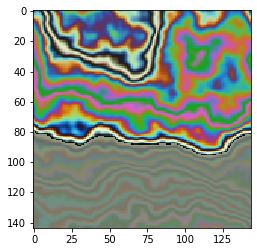

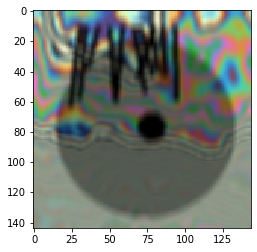

In [48]:
showImage(cleanImages[0][1])
showImage(images[0][1])

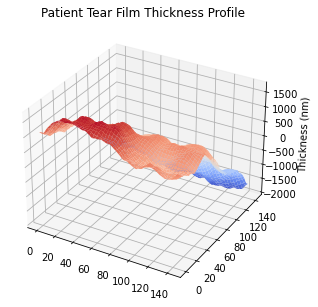

In [49]:
showMap(maps[0][0], dim = 144)

In [6]:
showMap(maps[0][11], dim = 144)

NameError: name 'showMap' is not defined

In [7]:
def showMap(depthMap, dim = 48):

    pData = np.reshape(depthMap, (dim,dim))

    fig = plt.figure(figsize = (5,5))
    ax1 = fig.add_subplot(projection='3d')

    x = np.arange(0, dim)
    y = np.arange(0, dim)
    X, Y = np.meshgrid(x, y)
    surf = ax1.plot_surface(X, Y, pData, cmap = cm.coolwarm)

    ax1.set_zlabel("Thickness" + " (" + "nm" + ")")
    ax1.set_title('Patient Tear Film Thickness Profile')



    return plt.show()

def showImage(image, dim = 144):
    data = np.reshape(image, (dim,dim,3))
    plt.imshow(imRegulate(data), interpolation='nearest')
    return plt.show()

def saveImage(image, fn, dim = 144):
    data = np.reshape(image, (dim,dim,3))
    plt.imshow(imRegulate(data), interpolation='nearest')
    plt.savefig(f'tmp/{fn}.png')

def saveMap(image, fn, dim = 144):
    pData = np.reshape(image, (dim,dim))
    
    fig = plt.figure(figsize = (5,5))
    ax1 = fig.add_subplot(projection='3d')
    ax1.set_zlim(0, 3000)
    x = np.arange(0, dim)
    y = np.arange(0, dim)
    X, Y = np.meshgrid(x, y)
    surf = ax1.plot_surface(X, Y, pData, cmap = cm.coolwarm)
    
    ax1.set_zlabel("Thickness" + " (" + "nm" + ")")
    ax1.set_title('Patient Tear Film Thickness Profile')


    plt.savefig(f'tmp/{fn}.png')
    
def imRegulate(data):
    m = np.max(data)
    mi = np.min(data)
    norm = ((data - mi) / (m - mi))*255
    return norm.astype(np.uint8)

In [8]:
def saveImages(imgSet):
 

    try:
        shutil.rmtree('tmp/')
    except:
        print("tmp/ does not exist")
    
    
    try:
        os. mkdir('tmp/')
    except:
        print("tmp/ exists")
        
    try:
        os.remove('tmp.zip')
    except:
        print("tmp.zip does not exist")
    for frame in range(imgSet.shape[0]):
        saveImage(imgSet[frame], frame)
        
    shutil.make_archive('tmp', 'zip', 'tmp/')

def saveMaps(imgSet):


    try:
        shutil.rmtree('tmp/')
    except:
        print("tmp/ does not exist")
    
    
    try:
        os. mkdir('tmp/')
    except:
        print("tmp/ exists")
        
    try:
        os.remove('tmp.zip')
    except:
        print("tmp.zip does not exist")
    for frame in range(imgSet.shape[0]):
        saveMap(imgSet[frame], frame)
        
    shutil.make_archive('tmp', 'zip', 'tmp/')

def saveEyeVideo(imgSet):
    saveImages(imgSet)
    image_folder = 'tmp'
    video_name = 'video1.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 4, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()
    
def saveMapVideo(imgSet):
    saveMaps(imgSet)
    image_folder = 'tmp'
    video_name = 'video.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, 0, 1, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()


In [7]:
saveEyeVideo(cleanImages[0])
# saveMapVideo(maps[0])

NameError: name 'cleanImages' is not defined

In [8]:
saveImages(images[0])

NameError: name 'images' is not defined

In [ ]:
saveEyeVideo(images[0])